ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #3
 
1. Для изображения sar_3.jpg найти наиболее протяженный участок
--------------------------------------------------------------------------------
Изображение sar_3.jpg успешно загружено


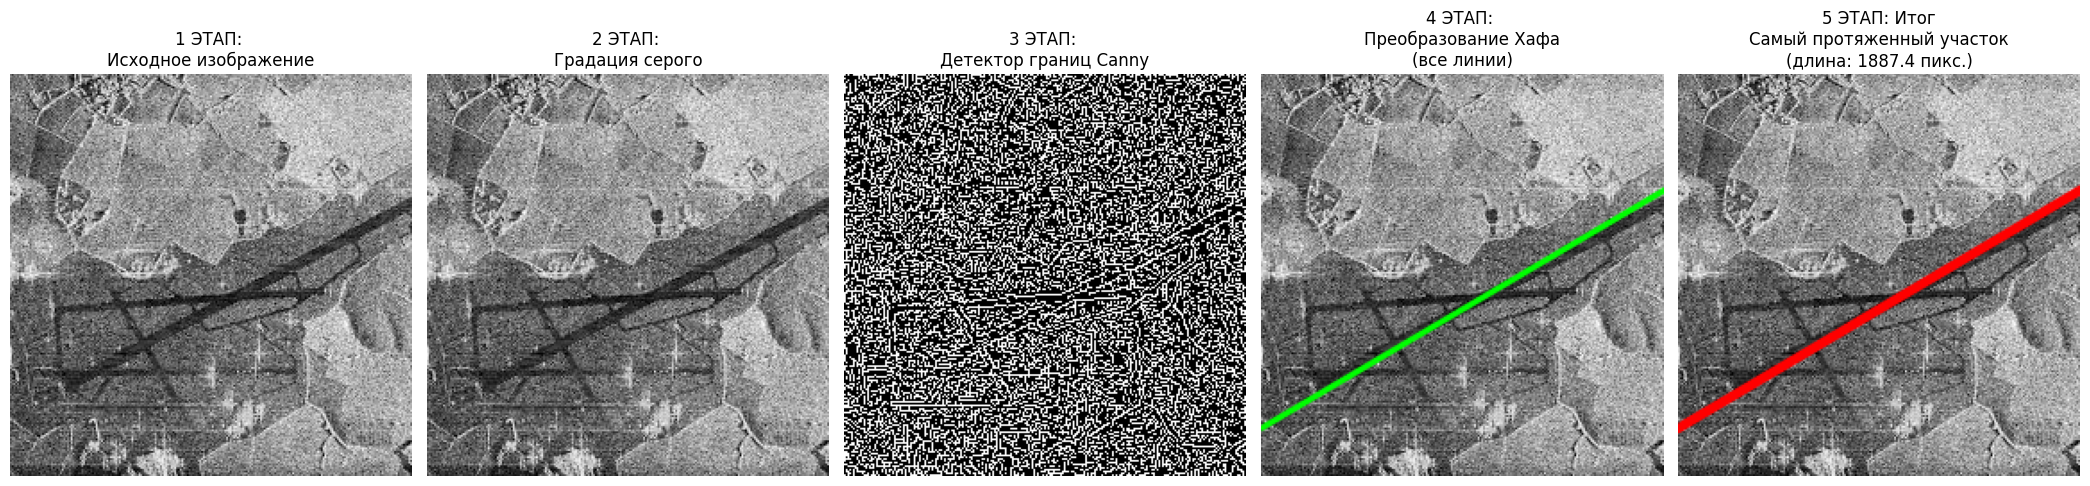

Наиболее протяженный участок:
- Длина: 1887.39 пикселей
- Координаты: (-808, 675) -> (817, -285)
- Угол наклона: -30.6°
- Всего линий найдено: 1
 
 
2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, 
выделить участок дорожной полосы.
--------------------------------------------------------------------------------


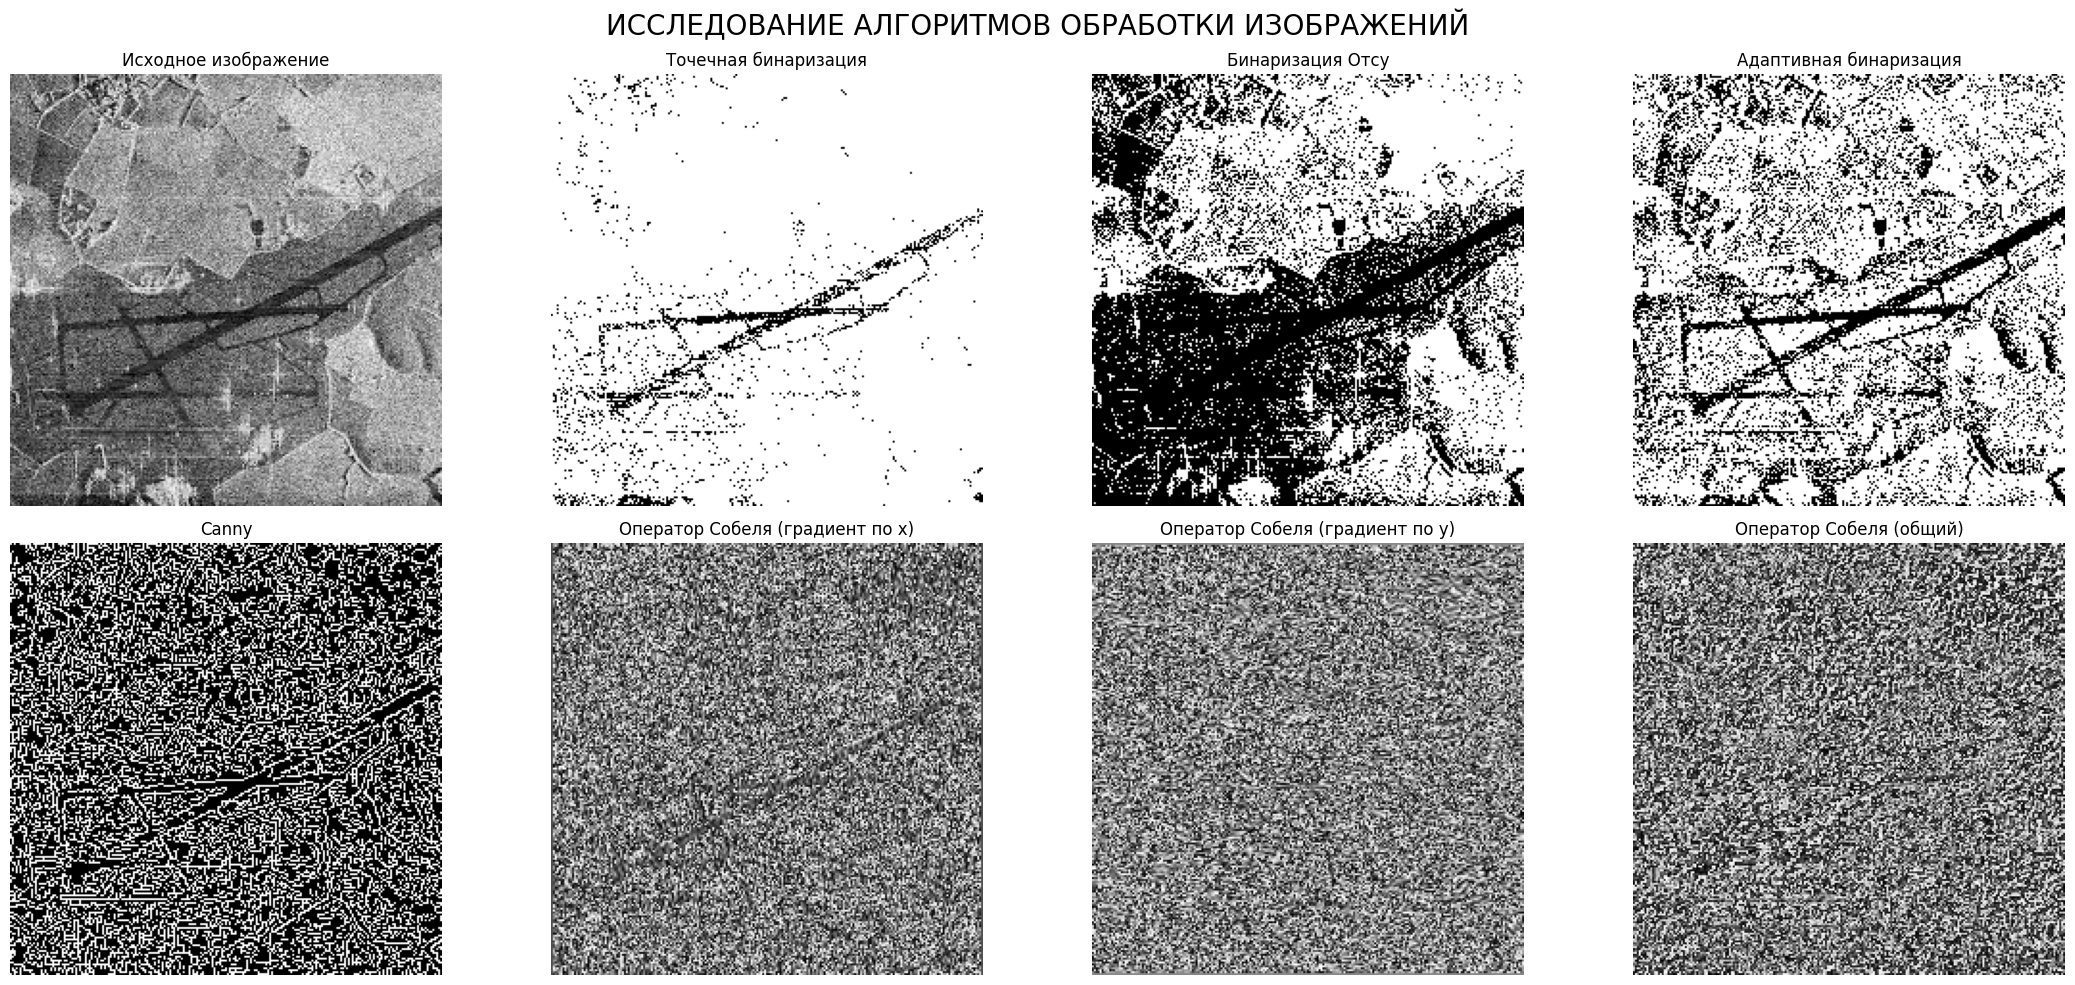

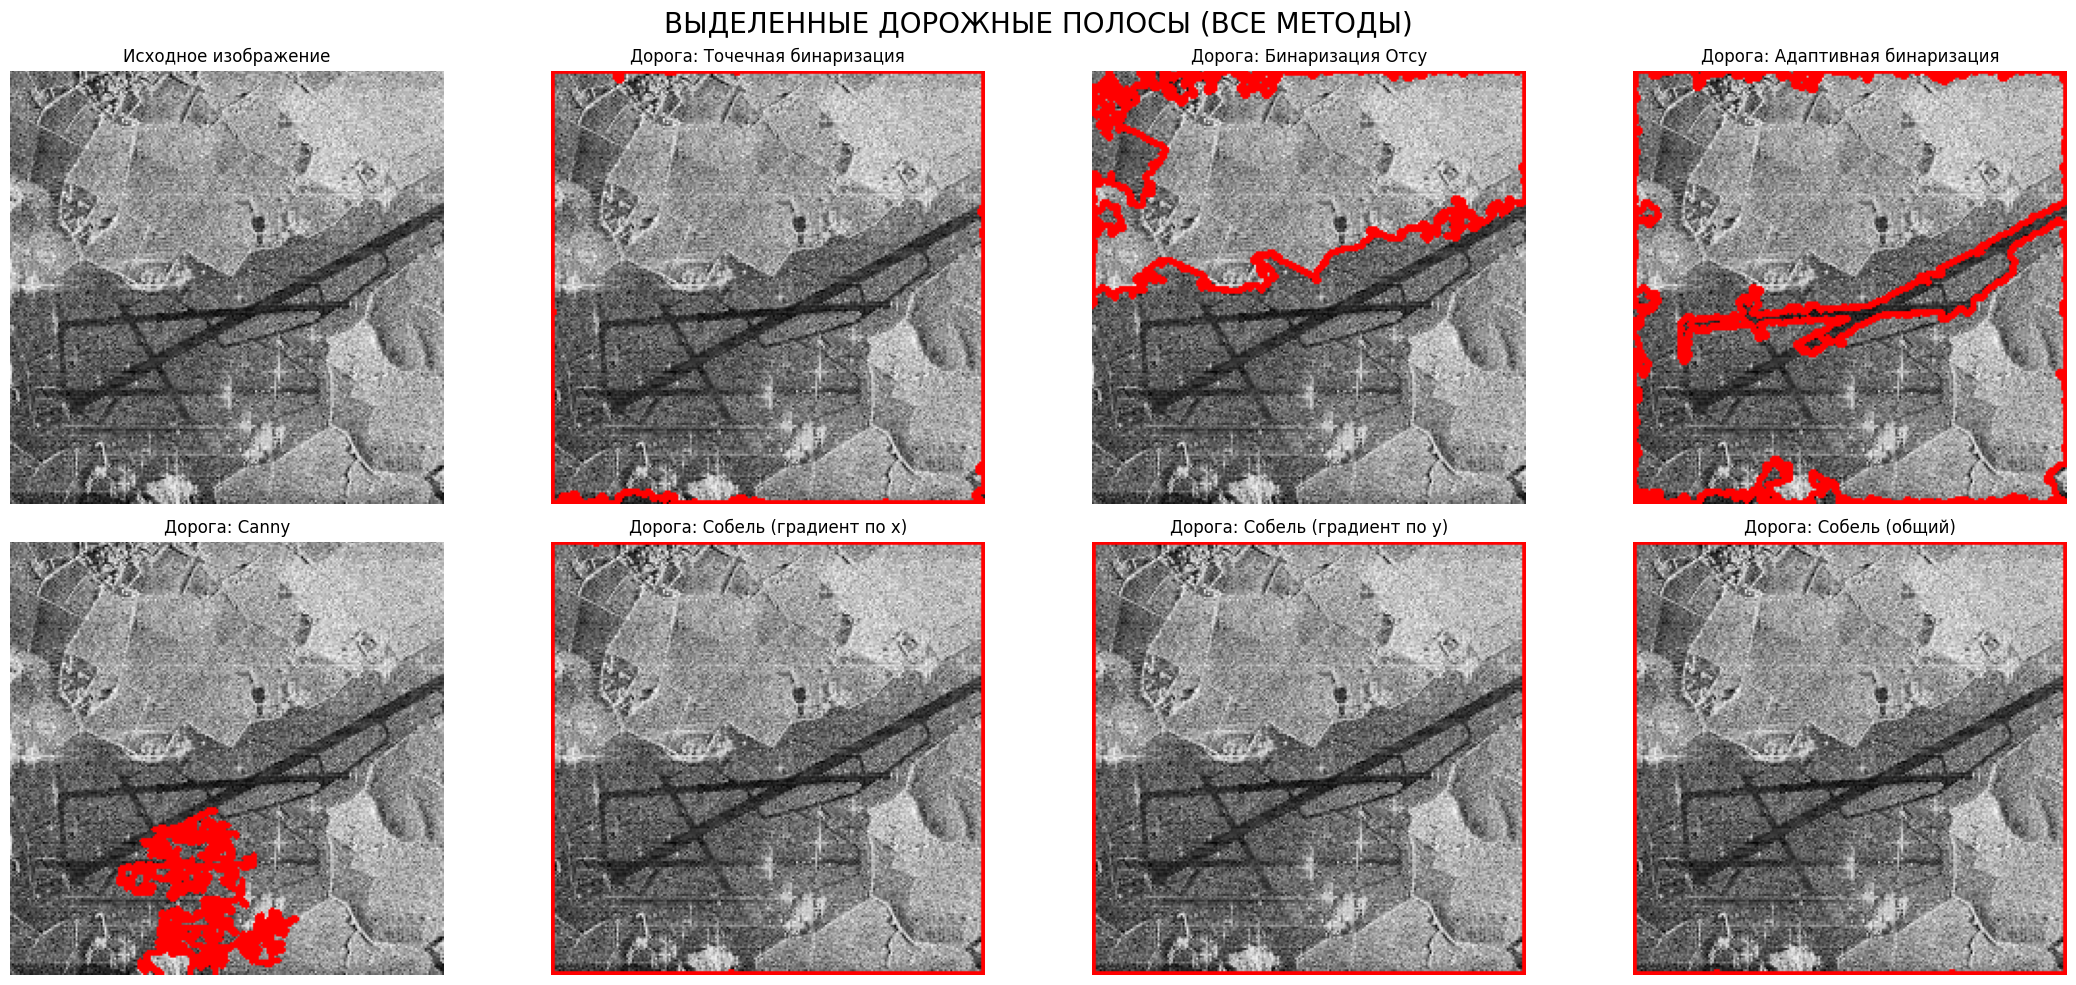

Анализ методов обработки:
- Точечная бинаризация: порог T=50
- Бинаризация Отсу: автоматический выбор порога
- Адаптивная бинаризация: локальная обработка с окном 71x71
- Оператор Собеля: выделение градиентов
- Детектор Canny: выделение границ с порогами 100-200

Всего протестировано методов для выделения дорожной полосы: 7


In [5]:
import numpy as np
import cv2
import copy
import matplotlib.pyplot as plt
import math

print("="*50)
print("ЛАБОРАТОРНАЯ РАБОТА ПО ОБРАБОТКЕ ИЗОБРАЖЕНИЙ #3")
print("="*50)
print(" ")

###1 ЗАДАНИЕ : Для изображения sar_3.jpg найти наиболее протяженный участок
print("1. Для изображения sar_3.jpg найти наиболее протяженный участок")
print("-"*80)

image = cv2.imread('sar_3.jpg')
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
if image is None:
    print("Изображение не найдено")
else:
    print("Изображение sar_3.jpg успешно загружено")

# Преобразуем в градации серого
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# используем Canny
canny = cv2.Canny(image_gray, 50, 150, apertureSize=3)

# используем полярные координаты
lines = cv2.HoughLines(canny, 1, np.pi / 180, 175)

# Создаем визуализацию всех линий и ищем самую длинную
lines_visualization = image.copy()
result = image.copy()
max_length = 0
longest_line_coords = None

if lines is not None:
    for i in range(len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho

        pt1 = (int(x0 + 1300 * (-b)), int(y0 + 800 * a))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 560 * a))

        # Рисуем все линии зеленым
        cv2.line(lines_visualization, pt1, pt2, (0, 255, 0), 2, cv2.LINE_AA)

        # Вычисляем длину линии
        length = np.sqrt((pt2[0]-pt1[0])**2 + (pt2[1]-pt1[1])**2)
        if length > max_length:
            max_length = length
            longest_line_coords = (pt1, pt2)

# Рисуем самую длинную линию красным
if longest_line_coords is not None:
    cv2.line(result, longest_line_coords[0], longest_line_coords[1], (0, 0, 255), 3, cv2.LINE_AA)

plt.figure(figsize=(21, 5))

plt.subplot(1, 5, 1)
plt.imshow(image)
plt.title('1 ЭТАП: \nИсходное изображение')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('2 ЭТАП: \nГрадация серого')
plt.axis('off')

plt.subplot(1, 5, 3)
plt.imshow(canny, cmap='gray')
plt.title('3 ЭТАП: \nДетектор границ Canny')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(cv2.cvtColor(lines_visualization, cv2.COLOR_BGR2RGB))
plt.title('4 ЭТАП: \nПреобразование Хафа\n(все линии)')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title(f'5 ЭТАП: Итог\nСамый протяженный участок\n(длина: {max_length:.1f} пикс.)')
plt.axis('off')

plt.tight_layout()
plt.show()

if longest_line_coords is not None:
    pt1, pt2 = longest_line_coords
    angle = np.degrees(np.arctan2(pt2[1]-pt1[1], pt2[0]-pt1[0]))
    print(f"Наиболее протяженный участок:")
    print(f"- Длина: {max_length:.2f} пикселей")
    print(f"- Координаты: {pt1} -> {pt2}")
    print(f"- Угол наклона: {angle:.1f}°")
    print(f"- Всего линий найдено: {len(lines)}")
else:
    print("Линии не найдены")
print(" ")
print(" ")



###2 ЗАДАНИЕ : Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.
print("2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, \nвыделить участок дорожной полосы.")
print("-"*80)

# Точечная бинаризация
bin_img = copy.deepcopy(image_gray)
T = 50
bin_img[image_gray < T] = 0
bin_img[image_gray >= T] = 255

# Бинаризация Отсу
_, th2 = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# Адаптивная бинаризация
th3 = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 71, 21)

# Оператор Собеля
scale = 1
delta = 0
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(image_gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_y = cv2.Sobel(image_gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)
grad_x_normalized = ((grad_x - grad_x.min()) * 255).astype(np.uint8)
grad_y_normalized = ((grad_y - grad_y.min()) * 255).astype(np.uint8)
grad = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0.0)
grad_normalized = ((grad - grad.min()) * 255).astype(np.uint8)

# Canny
edges = cv2.Canny(image_gray, 100, 200)

plt.figure(figsize=(22, 10))

plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(bin_img, cmap="gray")
plt.title('Точечная бинаризация')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(th2, cmap="gray")
plt.title('Бинаризация Отсу')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(th3, cmap="gray")
plt.title('Адаптивная бинаризация')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(edges, cmap="gray")
plt.title('Canny')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(grad_x_normalized, cmap="gray")
plt.title('Оператор Собеля (градиент по x)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(grad_y_normalized, cmap="gray")
plt.title('Оператор Собеля (градиент по y)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(grad_normalized, cmap="gray")
plt.title('Оператор Собеля (общий)')
plt.axis('off')

plt.suptitle("ИССЛЕДОВАНИЕ АЛГОРИТМОВ ОБРАБОТКИ ИЗОБРАЖЕНИЙ", fontsize=20)
plt.tight_layout()
plt.show()


# Поиск дорог
def extract_road(binary_img, original_img):
    contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        road_contour = max(contours, key=cv2.contourArea)
        result = original_img.copy()
        cv2.drawContours(result, [road_contour], -1, (0, 0, 255), 2)
        return result
    return original_img

# Применяем выделение дорог ко всем методам бинаризации
result1 = extract_road(bin_img, image)
result2 = extract_road(th2, image)
result3 = extract_road(th3, image)
result4 = extract_road(edges, image)
result5 = extract_road(grad_x_normalized, image)
result6 = extract_road(grad_y_normalized, image)
result7 = extract_road(grad_normalized, image)

plt.figure(figsize=(22, 10))

plt.subplot(2, 4, 1)
plt.imshow(image)
plt.title('Исходное изображение')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(result1, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Точечная бинаризация')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(result2, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Бинаризация Отсу')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(cv2.cvtColor(result3, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Адаптивная бинаризация')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(result4, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Canny')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(cv2.cvtColor(result5, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Собель (градиент по x)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(result6, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Собель (градиент по y)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(cv2.cvtColor(result7, cv2.COLOR_BGR2RGB))
plt.title('Дорога: Собель (общий)')
plt.axis('off')

plt.suptitle("ВЫДЕЛЕННЫЕ ДОРОЖНЫЕ ПОЛОСЫ (ВСЕ МЕТОДЫ)", fontsize=20)
plt.tight_layout()
plt.show()

print("Анализ методов обработки:")
print(f"- Точечная бинаризация: порог T={T}")
print(f"- Бинаризация Отсу: автоматический выбор порога")
print(f"- Адаптивная бинаризация: локальная обработка с окном 71x71")
print(f"- Оператор Собеля: выделение градиентов")
print(f"- Детектор Canny: выделение границ с порогами 100-200")
print(f"\nВсего протестировано методов для выделения дорожной полосы: 7")